<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'precision': np.float64(1.0), 'accuracy': np.float64(0.9972222222222222), 'recall': np.float64(0.9696969696969697), 'f1_score': np.float64(0.9846153846153847)}
0.9972222222222222


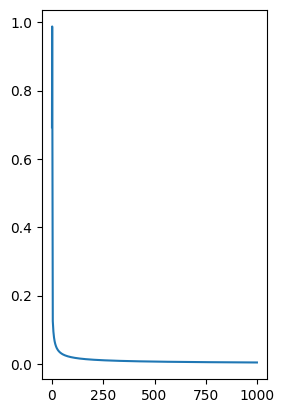

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets

class LogisticRegressionFromScratch:
  def __init__(self, learning_rate = 0.001, max_iterations=1000):
    self.learning_rate = learning_rate
    self.max_iterations = max_iterations
    self.weights = None
    self.bias = 0
    self.costs = []

  def sigmoid(self, z):
    return (1/(1+np.exp(-z)))

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)

    for _ in range(self.max_iterations):
      model_linear = np.dot(X , self.weights) + self.bias
      predictions = self.sigmoid(model_linear)

      cost = -(1/n_samples)*np.sum(y*np.log(predictions + 1e-9)+(1-y)*np.log(1-predictions + 1e-9))
      self.costs.append(cost)

      dw = (1/n_samples) * np.dot(X.T, (predictions - y))
      db = (1/n_samples) * np.sum(predictions - y)

      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    model_linear = np.dot(X , self.weights) + self.bias
    y_predict = self.sigmoid(model_linear)
    return np.array([1 if x > 0.5 else 0 for x in y_predict])

  def evaluatioin(self, y_true, y_predict):
    true_positive = np.sum((y_true == 1) & (y_predict == 1))
    true_negaive = np.sum((y_true == 0) & (y_predict == 0))
    false_positive = np.sum((y_true == 0) & (y_predict == 1))
    false_negative = np.sum((y_true == 1) & (y_predict == 0))

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    accuracy = (true_positive + true_negaive) / len(y_true)

    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'precision' : precision,
        'accuracy' : accuracy,
        'recall' : recall,
        'f1_score' : f1_score
    }



# X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
#                            n_informative=2, random_state=42, n_clusters_per_class=1)

digits = datasets.load_digits()

X = digits.data
# y = digits.target
y = (digits.target == 0).astype(int)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

model = LogisticRegressionFromScratch(learning_rate=0.01, max_iterations= 1000)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
information = model.evaluatioin(y_test, y_predict)
print(information)
accuracy = np.sum(y_predict == y_test) / len(y_test)
print(accuracy)
plt.subplot(1,2,1)
plt.plot(range(len(model.costs)), model.costs)

